# Array Based Sequences

This notebook describes Array Based Sequences. It covers the following:

1. Sequence Type in Python
2. Low Level Arrays
3. Strings
4. Referential vs Compact Arrays
5. Dynamic Arrays
6. Efficiency of Strings, Lists, and Tuples
7. Speed of Various Methods

For each concept, there are Python examples which help illustrate the ideas.

## 1. Sequence Type in Python

Python has 3 built-in sequence classes:
* List
* Tuple
* String

Each of these Classes:
* Support Indexing
* Use an *array* to represent the sequence

Here is the ABT for a Sequence

In [1]:
from abc import ABCMeta, abstractmethod

class Sequence(metaclass=ABCMeta):  
    """
    Version of collections.Sequence Abstract Base Class
    From Data Structures and Algorithms in Python (Goodrich et al.)
    
    Note: This is a metaclass (not a superclass).
    Meaning this provides a template for the class definition itself.
    constructor for this class raises an error.
    """

    @abstractmethod
    def __len__(self):
        """return the length of the sequence."""

    @abstractmethod    
    def __getitem__(self, j):
        """return the element at index j of the sequence"""

    def __contains__(self, val):
        """returns True if val found in the sequence; False otherwise"""
        for j in range(len(self)):
            if self[j] == val: #  found a match
                return True
        return False

    def index(self, val):
        """returns leftmost index at which val is found (or raise ValueError)"""
        for j in range(len(self)):
            if self[j] == val: #  leftmost match
                return j
        raise ValueError('value not in sequence') #  never found a match

    def count(self, val):
        """return the number of elements equal to given value"""
        k = 0
        for j in range(len(self)):
            if self[j] == val:  # found a match
                k += 1
        return k

## 2. Low Level Arrays

![](images/arrays.png)

## 3. Strings

![](images/strings.png)

## 4. Referential vs Compact Arrays

Referential arrays store *references* to objects.
* This way, we can store objects with different sizes, since the reference always has the same size (8 Bytes).
* We can have multiple lists containing references to the same items. In particular, we have slices:

![](images/referential_vs_compact.png)

In [2]:
primes = [2, 3, 5, 7, 11, 13, 17, 19]
temp = primes[3:6]
temp[2] = 15
print('temp = {}'.format(temp)) # changes!
print('primes = {}'.format(primes)) # doesn't change since alias was broken (since ints are immutable)!

temp = [7, 11, 15]
primes = [2, 3, 5, 7, 11, 13, 17, 19]


Since int is an immutable data type, overriding the element in the second index of `temp` breaks its alias with the element in the sixth index of `primes`

Notice how this code would behave unexpectedly if we had a mutable data type in our list.
For an extreme example, consider the two lists

In [3]:
x = [0]*8
y = [[0]]*8

print('before x: {}'.format(x))
print('before y: {}'.format(y))

x[0] = 1
y[0].pop()

print('list x is now: {}'.format(x))
print('list y is now: {}'.format(y))

before x: [0, 0, 0, 0, 0, 0, 0, 0]
before y: [[0], [0], [0], [0], [0], [0], [0], [0]]
list x is now: [1, 0, 0, 0, 0, 0, 0, 0]
list y is now: [[], [], [], [], [], [], [], []]


Items in a list can point to same memory address.
For example, in `y` all items point to the same memory address

In [4]:
for i in y:
    print(id(i))

140608646453920
140608646453920
140608646453920
140608646453920
140608646453920
140608646453920
140608646453920
140608646453920


For `x`, the first item points to a different address (since alias was broken)

In [5]:
for i in x:
    print(id(i))

93971634381600
93971634381568
93971634381568
93971634381568
93971634381568
93971634381568
93971634381568
93971634381568


Items in list can point to same memory address

In [6]:
x = [1,2,3]
y = [x, x]
print('before: {}'.format(y))
x.remove(1)
print('after: {}'.format(y)) #  notice how both columns changed (since both alias the same underlying object)!

before: [[1, 2, 3], [1, 2, 3]]
after: [[2, 3], [2, 3]]


Different lists can have items that point to same memory address

In [7]:
x = [1,2,3]
y = [x, [4,5,6]]
z = [x, [7,8,9]]  #  both y and z contain reference to x

print('before y: {}'.format(y))
print('before z: {}'.format(z))
x.remove(1)
print('after y: {}'.format(y))
print('after z: {}'.format(z))

before y: [[1, 2, 3], [4, 5, 6]]
before z: [[1, 2, 3], [7, 8, 9]]
after y: [[2, 3], [4, 5, 6]]
after z: [[2, 3], [7, 8, 9]]


Combining the above 2 concepts.
* Notice that the slice of `y` from index 0 to 1 (i.e. `y[0:2]`) point to the same objects as `y` does at indices 0 and 1.
* So mutating items in `y[0:2]` mutates them in `y` too.
* And since both items in the slice point to the same object, the `.pop()` is actually being called twice!

In [8]:
x = [1,2,3]
y = [x, x, x]
for item in y[0:2]:
    item.pop()
print(y)

[[1], [1], [1]]


## 5. Dynamic Arrays

![](images/dynamic_arrays.png)

![](images/dynamic_arrays2.png)

Notes:
* the list (referential array) increases in size as elements are added
* Because a list is a referential structure, the result of `getsizeof` only includes the size for representing its primary structure (the references). 
* It does not account for memory used by the objects that the references refer to.

In [10]:
import sys

test_list = []
prev_size = 0
for _ in range(18):
    curr_size = sys.getsizeof(test_list)
    change = curr_size - prev_size
    test_list.append(None)
    print('{} element list has {} Bytes. {} Bytes added {} -> {}'.format(len(test_list)-1, curr_size, change, len(test_list)-2, len(test_list)-1))
    prev_size = curr_size

0 element list has 72 Bytes. 72 Bytes added -1 -> 0
1 element list has 104 Bytes. 32 Bytes added 0 -> 1
2 element list has 104 Bytes. 0 Bytes added 1 -> 2
3 element list has 104 Bytes. 0 Bytes added 2 -> 3
4 element list has 104 Bytes. 0 Bytes added 3 -> 4
5 element list has 136 Bytes. 32 Bytes added 4 -> 5
6 element list has 136 Bytes. 0 Bytes added 5 -> 6
7 element list has 136 Bytes. 0 Bytes added 6 -> 7
8 element list has 136 Bytes. 0 Bytes added 7 -> 8
9 element list has 200 Bytes. 64 Bytes added 8 -> 9
10 element list has 200 Bytes. 0 Bytes added 9 -> 10
11 element list has 200 Bytes. 0 Bytes added 10 -> 11
12 element list has 200 Bytes. 0 Bytes added 11 -> 12
13 element list has 200 Bytes. 0 Bytes added 12 -> 13
14 element list has 200 Bytes. 0 Bytes added 13 -> 14
15 element list has 200 Bytes. 0 Bytes added 14 -> 15
16 element list has 200 Bytes. 0 Bytes added 15 -> 16
17 element list has 272 Bytes. 72 Bytes added 16 -> 17


* So going from zero elements to one leads to an increase of 32 Bytes $\Rightarrow$ 32/8 = 4 Memory Addresses.
* Indeed, the array doesn't change size until the 5th element!
* We can see from the pic below that the time for each append changes, but doesn't seem to increase during steps when the array size increases!

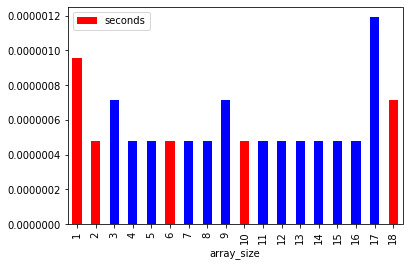

In [16]:
import time
import pandas as pd
import matplotlib.pyplot as plt

recorded_data = pd.DataFrame(columns=['seconds', 'change', 'has_changed', 'array_size'])
test_list = []
prev_size = 0
for _ in range(18):
    curr_size = sys.getsizeof(test_list)
    change = curr_size - prev_size
    start = time.time()
    test_list.append(None)
    end = time.time()
    prev_size = curr_size
    recorded_data = recorded_data.append({'array_size': len(test_list), 
                                          'seconds': round(end-start, 10), 
                                          'change': change, 
                                          'has_changed': change > 0}, ignore_index=True)
    
colors = ['red' if x else 'blue' for x in recorded_data.has_changed.tolist()]
recorded_data.plot(x='array_size', y='seconds', kind='bar', color=colors)

## 6.  Efficiency of Strings, Lists, and Tuples

![](images/methods.png)

## 7. Speed of Various Methods

![](images/speeds.png)